# Churn Analysis

In this project, I will be analyzing a dataset containing details of a bank's customers and their churn rates, and building a series of different models that help predict the characteristics of customers that are at risk of churning. Churn refers to a loss in customer, or in this case, the number of customers who close their accounts and end their relationship with the bank. It is important for banks (and other companies with customers) to identify people who are at risk of churning so that proactive measures, such as targeted marketing, can be taken to help retain those customers for the future.

The dataset was obtained from kaggle: https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling/data

### EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

/Users/siddthekidd/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/siddthekidd/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
#Read in data
df = pd.read_csv('Churn_Modelling.csv')
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#Check for 10000 rows and 14 columns, no missing values, and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
#Check for nulls
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
#Check for duplicates
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [6]:
#Convert categorical variables to numerical
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [7]:
#Descriptive statistics
df.describe()

,RowNumber,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


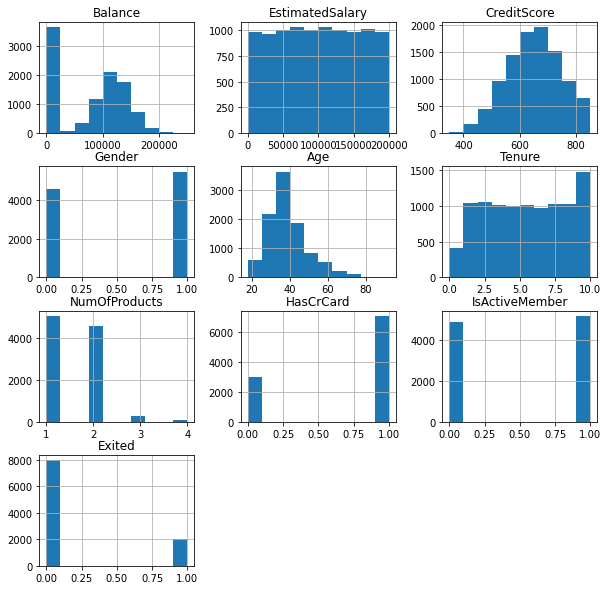

In [8]:
#Historgram for all columns
df[['Balance', #Binodal
    'EstimatedSalary', #Uniform
    'CreditScore', #Normal
    'Gender',
    'Age', #Skewed right
    'Tenure', #Non-uniform
    'NumOfProducts',
    'HasCrCard',
    'IsActiveMember',
    'Exited']].hist(figsize=(10,10))
plt.show()

In [9]:
df['Exited'].describe()

count    10000.000000
mean         0.203700
std          0.402769
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Exited, dtype: float64

- Balance: numeric, ranging from $0 to $250898.09, average is $76485.88, normal distribution with a large node where balance is $0
- EstimatedSalary: numeric, ranging from $11.58 to $199992.48, average is 100090.24, uniforma distribution
- CreditScore: numeric, ranging from 350 to 850, average is 650.53, normal distribution with a light left-skew
- Age: numeric, ranging from 18 to 92 years, average is 38.92, distribution is normal skewed-right
- Tenure: numeric, ranging from 0 to 10 years, average is 5.01, distribution is moderately uniform with the ends diverging from the peak
- NumOfProducts: numeric, ranging from 1 to 4, average is 1.53
- Gender: binary (1 is male, 0 is female), 54.57% male and 45.43% female customers
- HasCrCard: binary (1 is yes, 0 is no), 70.55% have a credit card
- IsActiveMember: binary (1 is yes, 0 is no), 51.51% are active members
- Exited: binary (1 is yes, 0 is no), 20.37% have exited or churned


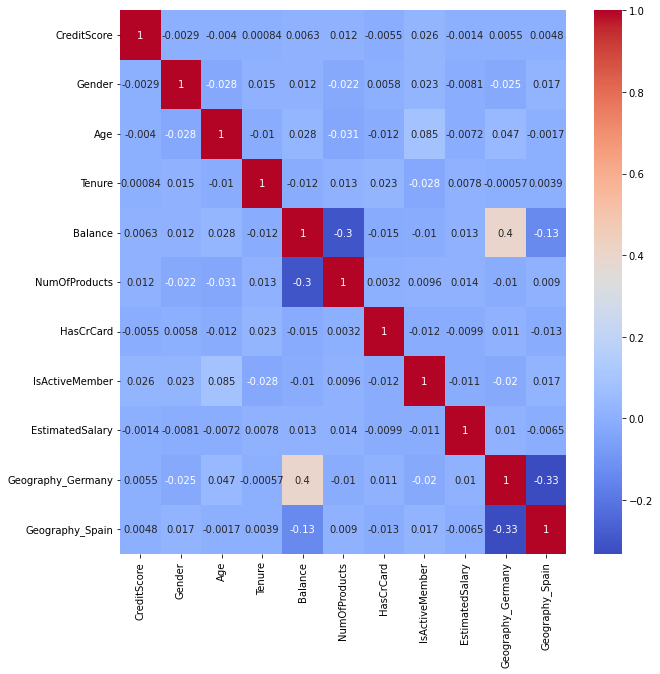

In [10]:
#Correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df[['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
            'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain']].corr(), annot=True, cmap='coolwarm')
plt.show()

The dataset contains 13 columns, 12 of which are explanatory variables of numerical or categorical datatypes (categoricals were label encoded), and 1 response column called "Exited." If "Exited" is 0 then the customer is still with the bank and if it is 1 then the customer left the bank. I will remove the 2 irrelevant columns of "CustomerId" and "Surname", change appropriate categorical variables to binary, create dummy variables for "Geography," and scale the data to account for the varying range of values present. The remaining 11 features will be used to build the different models. After each model has been trained and tested, I will select the best performing one with the most realistic use-case to use as the final output.

In [11]:
#Scale data
features = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
            'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain']

X = df[features]
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scale data 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Modeling

I will be building and evaluating several different regression and classification models by creating a confusion matrix, classification report (that will display precision, recall, and F1 scores), and accuracy score for each. Here is a list and brief description of each model.
1. Random Forest Classifier:
- Ensemble machine learning method that builds multiple decision trees through bootstrap aggregating and random feature selection to reduce overfitting and improve generalization
- Great for general-purpose classification, especially when interpretability is not a priority
2. Logistic Regression:
- Fits a linear decision boundary and applys a logistic transformation to predict probabilities
- Most simple and easiest to interpret model
3. Support Vector Machine
- Supervised learning algorithm that finds the optimal hyperplane that maximizes the margin between classes through the use of a kernel function
- Ideal for small to medium-sized datasets with clear margins or non-linear boundaries
4. KNN Classifier
- Non-parametric algorithm that classifies a data point based on the majority class of its k-nearest neighbors in the feature space
- Best for small datasets with low dimensionality and when simplicity is preferred
5. Gradient Boosting Classifier
- Ensemble technique that builds trees sequentially, where each tree corrects the errors of the previous one to minimize the loss function
- Best for high accuracy requirements and when computational resources are available

In [12]:
### Random forest classifier 
model_rfc = RandomForestClassifier(n_estimators=100, random_state=42)
model_rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
y_pred_rfc = model_rfc.predict(X_test)

In [14]:
conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)
class_report_rfc = classification_report(y_test, y_pred_rfc)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)

print(conf_matrix_rfc)
print(class_report_rfc)
print(accuracy_rfc) #0.8665

[[1551   56]
 [ 211  182]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000

0.8665


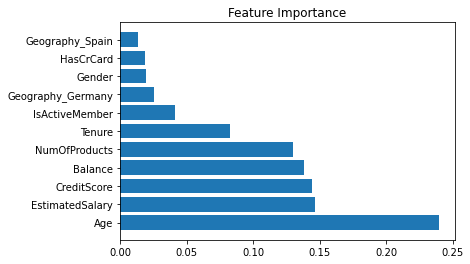

In [15]:
# Visualize feature importance
importances = model_rfc.feature_importances_
indices = np.argsort(importances)[::-1]
names = [features[i] for i in indices]

plt.figure()
plt.title('Feature Importance')
plt.barh(range(X.shape[1]), importances[indices])
plt.yticks(range(X.shape[1]), names)
plt.show()

In [16]:
# Display the coeeficients for each feature
for feature, importance in zip(features, model_rfc.feature_importances_):
    print(f'{feature}: {importance}')

CreditScore: 0.14421397681027365
Gender: 0.019258227500891876
Age: 0.23978309696342173
Tenure: 0.08242714683413771
Balance: 0.13861331093120613
NumOfProducts: 0.13025455506075417
HasCrCard: 0.018722388930709353
IsActiveMember: 0.04110996081421406
EstimatedSalary: 0.1466384615058124
Geography_Germany: 0.025710526533804953
Geography_Spain: 0.013268348114773886


In [17]:
##Logistic Regression
from sklearn.linear_model import LogisticRegression

#Build and train logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

#Predictions
y_pred_log_reg = log_reg.predict(X_test)

#Evaluation
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg) #0.811

print(conf_matrix_log_reg, class_report_log_reg, accuracy_log_reg)

[[1543   64]
 [ 314   79]]               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000
 0.811


In [18]:
##Support Vector Machine
from sklearn.svm import SVC

#Build and train SVM model
svm = SVC(kernel = 'linear', random_state=42)
svm.fit(X_train, y_train)

#Predictions
y_pred_svm = svm.predict(X_test)

#Evaluation
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm) #0.8035

print(conf_matrix_svm, class_report_svm, accuracy_svm)

[[1607    0]
 [ 393    0]]               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000
 0.8035


/Users/siddthekidd/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/siddthekidd/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/siddthekidd/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [19]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

#Build and train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#Predictions
y_pred_knn = knn.predict(X_test)

#Evaluation
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn) #0.83

print(conf_matrix_knn, class_report_knn, accuracy_knn)

[[1514   93]
 [ 247  146]]               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1607
           1       0.61      0.37      0.46       393

    accuracy                           0.83      2000
   macro avg       0.74      0.66      0.68      2000
weighted avg       0.81      0.83      0.81      2000
 0.83


In [20]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

#Build and train Gradient Boosting model
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc.fit(X_train, y_train)

#Predictions
y_pred_gbc = gbc.predict(X_test)

#Evaluation
conf_matrix_gbc = confusion_matrix(y_test, y_pred_gbc)
class_report_gbc = classification_report(y_test, y_pred_gbc)
accuracy_gbc = accuracy_score(y_test, y_pred_gbc) #0.8675

print(conf_matrix_gbc, class_report_gbc, accuracy_gbc)

[[1543   64]
 [ 201  192]]               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000
 0.8675


### Results

In [21]:
#Print accuracy scores for all models
print('Random Forest Classifier: ', accuracy_rfc)
print('Logistic Regression: ', accuracy_log_reg)
print('Support Vector Machine: ', accuracy_svm)
print('KNN Classifier: ', accuracy_knn)
print('Gradient Boosting Classifier: ', accuracy_gbc)

Random Forest Classifier:  0.8665
Logistic Regression:  0.811
Support Vector Machine:  0.8035
KNN Classifier:  0.83
Gradient Boosting Classifier:  0.8675


### Results and Conclusions

Key Findings:

1. Best Performing Model: Gradient Boosting Classifier achieved the highest accuracy of 0.8675, slightly outperforming the Random Forest Classifier (0.8665). This indicates that Gradient Boosting is highly effective for this dataset, likely due to its ability to model complex, non-linear relationships and interactions between features.

2. Strong Ensemble Models: both ensemble methods, Random Forest and Gradient Boosting, performed exceptionally well, with accuracy scores above 0.86. This demonstrates the power of ensemble techniques in improving predictive performance by combining multiple weak learners.

3. Baseline Performance: Logistic Regression and SVM models achieved lower accuracy scores of 0.811 and 0.8035, respectively. While these models are simpler and more interpretable, their performance suggests that the dataset may contain non-linear patterns that linear models struggle to capture.

4. KNN Classifier: the KNN Classifier achieved an accuracy of 0.83, which is competitive but slightly lower than the ensemble models. KNN's performance is often sensitive to the choice of hyperparameters (e.g., k and distance metric) and the scale of the data, which may explain its moderate performance.

Based on the results, Age is the most important feature for predicting whether a customer would churn or not, followed by EstimatedSalary, CreditScore, and Balance. The Gradient Boosting Classifier is the best-performing model for predicting customer churn in this dataset, closely followed by the Random Forest Classifier. These models' ability to capture complex relationships in the data makes them well-suited for this task. While simpler models like Logistic Regression and SVM provide interpretability, their lower accuracy scores suggest they may not be the best choice for this specific problem.

For future work, I would pursue the following methods:
- Hyperparameter Tuning: further tuning of hyperparameters for all models, especially KNN and SVM, to potentially improve their performance.
- Feature Engineering: exploring additional feature engineering techniques to enhance model performance, or remove less significant features and keep the most important ones to simplify the final model.
- Model Interpretability: using tools like SHAP or LIME to interpret the ensemble models and gain additional insights into the most important factors driving churn.
- Evaluation Metrics: considering other metrics like precision, recall, F1-score, and AUC-ROC to evaluate model performance, as accuracy alone may not fully capture the effectiveness of a churn prediction model.

Overall, this analysis demonstrates the effectiveness of ensemble methods in predicting customer churn and provides a strong foundation for further optimization and deployment. Bank's can use this information by making a stronger attempt to retain customers who have characterists that increase their likelihood to churn.

### Further Analysis

##### Advanced Feature Selection

In the steps below, I will perform an advanced feature selection by creating the following columns to see if we can improve the accuracy score from the standard models:
- BalanceZero: change to a binary column based on Balance, where 0 is if the balance equals 0 and 1 is if the balance is greater than 0
- AgeGroup: create 8 different bins that are reflected as dummy variables in the dataset
- BalanaceToSalary: ratio of Balance to EstimatedSalary
- ProductUsage: NumOfProducts multiplied by IsActiveMember
- Tenure: create 4 different bins that are reflected as dummy variables

In [22]:
#Refresh dataset 
df = pd.read_csv('Churn_Modelling.csv')
#Feature engineering
df['BalanceZero'] = (df['Balance'] == 0).astype(int) #Balance binary
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 65, 75, 85, 95],
                        labels=['18-25','26-35','36-45','46-55','56-65','66-75','76-85','86-95']) #Age buckets
df['BalanceToSalary'] = df['Balance'] / df['EstimatedSalary'] #Balance: Estimated Salary ratio
df['ProductUsage'] = df['NumOfProducts'] * df['IsActiveMember'] #NumOfProducts * isActiveMember
df['TenureGroup'] = pd.cut(df['Tenure'], bins=[0, 2, 5, 7, 10], labels=['0-2','3-5','6-7','8-10']) #Tenure buckets

In [23]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)
df['Male_Germany'] = df['Gender'] * df['Geography_Germany']
df['Male_Spain'] = df['Gender'] * df['Geography_Spain']

df = pd.get_dummies(df, columns=['AgeGroup', 'TenureGroup'], drop_first=True)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,...,AgeGroup_26-35,AgeGroup_36-45,AgeGroup_46-55,AgeGroup_56-65,AgeGroup_66-75,AgeGroup_76-85,AgeGroup_86-95,TenureGroup_3-5,TenureGroup_6-7,TenureGroup_8-10
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,...,False,True,False,False,False,False,False,False,False,False
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,...,False,True,False,False,False,False,False,False,False,False
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,...,False,True,False,False,False,False,False,False,False,True
3,4,15701354,Boni,699,0,39,1,0.00,2,0,...,False,True,False,False,False,False,False,False,False,False
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,...,False,True,False,False,False,False,False,False,False,False


In [24]:
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
            'Geography_Germany', 'Geography_Spain', 'BalanceZero', 'BalanceToSalary', 'ProductUsage', 'Male_Germany', 'Male_Spain'] + \
            [col for col in df.columns if 'AgeGroup' in col] + [col for col in df.columns if 'TenureGroup' in col]
X = df[features]
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Random Forest Classifier (model of choice)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(conf_matrix)
print(class_report)
print(accuracy)

[[1547   60]
 [ 210  183]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000

0.865


I used the Random Forest Classifier for my new model evaluation. The original model has an accuracy score of 0.8665, while the new model with manipulated columns has a score of 0.865. This difference is not significant enough to warrant using the new model, especially since it will be more computationally expensive with more columns. If the dataset was larger or I performed a cross-validation test we may be able to get more robust results.